In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [17]:
import pandas as pd

In [18]:
BASE_DIR = 'D:/Users/Danny/FROM C/Desktop/Datasets'
seedSet = pd.read_csv(BASE_DIR+'/seeds.csv')
seedSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           210 non-null    float64
 1   perimeter      210 non-null    float64
 2   compactness    210 non-null    float64
 3   length         210 non-null    float64
 4   width          210 non-null    float64
 5   asymmetry      210 non-null    float64
 6   groove length  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [19]:
from sklearn.cluster import KMeans

In [20]:
#List to store the metric value given different K values.
inertia = []
#Range of the different values of K to analyse
K = range(2,10)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(seedSet)
    inertia.append(km.inertia_)

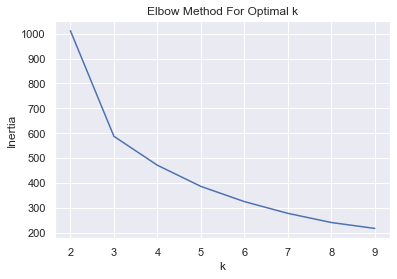

In [21]:
plt.plot(K, inertia)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [22]:
#import 
from sklearn.metrics import silhouette_score
#list to score metric from different k values. 
s_score = []
#range to anlayse
K  = range(2,10)
for k in K: 
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(seedSet)
    s_score.append(silhouette_score(seedSet, kmeans.labels_))

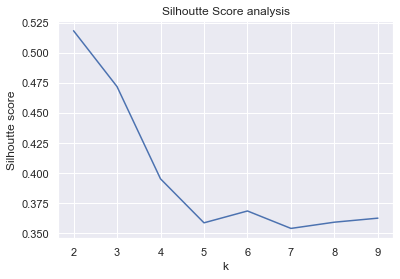

In [23]:
#plotting
plt.plot(K, s_score)
plt.xlabel('k')
plt.ylabel('Silhoutte score')
plt.title('Silhoutte Score analysis')
plt.show()

In [24]:
seedSet.corr(method = 'pearson')

,area,perimeter,compactness,length,width,asymmetry,groove length
area,1.000000,0.994341,0.609032,0.949985,0.970771,-0.229572,0.863693
perimeter,0.994341,1.000000,0.530036,0.972422,0.944829,-0.217340,0.890784
compactness,0.609032,0.530036,1.000000,0.368725,0.762159,-0.332585,0.227654
length,0.949985,0.972422,0.368725,1.000000,0.860415,-0.171562,0.932806
width,0.970771,0.944829,0.762159,0.860415,1.000000,-0.258036,0.749131
asymmetry,-0.229572,-0.217340,-0.332585,-0.171562,-0.258036,1.000000,-0.011079
groove length,0.863693,0.890784,0.227654,0.932806,0.749131,-0.011079,1.000000


In [25]:
samples = seedSet.values

In [26]:
kmeans = KMeans(n_clusters = 3) #definition of model
kmeans.fit(samples) #training
y_kmeans = kmeans.predict(samples) #predicting

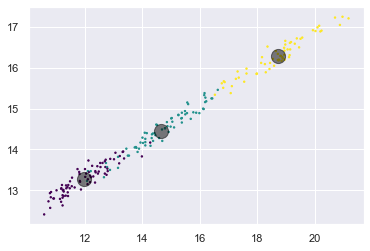

In [27]:
plt.scatter(samples[:, 0], samples[:, 1], c=y_kmeans, s=2, cmap='viridis')

centers = kmeans.cluster_centers_ 
plt.scatter(centers[:,0],centers[:,1], c = 'black', s = 200, alpha = 0.5)

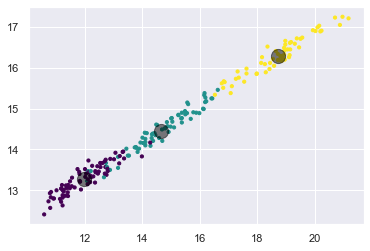

In [28]:
plt.scatter(samples[:, 0], samples[:, 1], c=y_kmeans, s=10, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [29]:
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, x, n_clusters = 3, rseed=0, ax = None):
    labels = kmeans.fit_predict(x)
    
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(x[:,0],x[:,1], c = labels, s =10, cmap = 'viridis', zorder = 2)
    
    # plot the representation of the kmeans model
    centers = kmeans.cluster_centers_ 
    radii = [cdist(x[labels == i], [center]).max()
            for i, center in enumerate(centers)]
    for c, r, in zip(centers, radii):
        ax.add_patch(plt.Circle(c,r,fc = '#CCCCCC', lw = 3, alpha=0.5, zorder = 1))

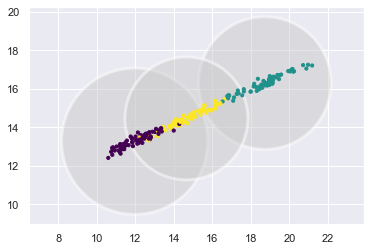

In [30]:
kmeans = KMeans(n_clusters= 3, random_state = 0 )
plot_kmeans(kmeans, samples)

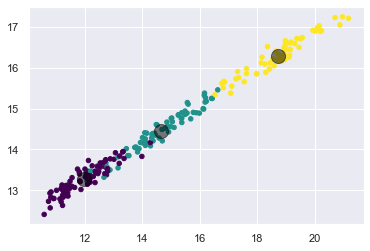

In [31]:
plt.scatter(samples[:, 0], samples[:, 1], c=y_kmeans, s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);